In [1]:
from functools import partial
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import ChainConsumer
from scipy.optimize import curve_fit
import seaborn as sns

import src.beam_functions as BF
import src.spherical_harmonics as SH
import src.forward_model as FM
import src.sky_models as SM
import src.map_making as MM
import src.plotting as PL
from src.blockmat import BlockMatrix, BlockVector
from anstey.generate import T_CMB

RS = SH.RealSphericalHarmonics()

In [2]:
narrowcos = lambda x: BF.beam_cos(x, 0.8)
mat_A, (mat_G, mat_P, mat_Y, mat_B) = FM.calc_observation_matrix_zenith_driftscan(nside=8, lmax=8, lat=-26, times=np.linspace(0, 24, 100, endpoint=False), beam_use=narrowcos, return_mat=True)


successfully loaded spherical_harmonic_matrix npix, nalm : 768 45


/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]


In [3]:
np.diag(mat_B)

array([ 1.00299707,  0.83431052,  0.83431052,  0.83431052,  0.56566438,
        0.56566438,  0.56566438,  0.56566438,  0.56566438,  0.29513792,
        0.29513792,  0.29513792,  0.29513792,  0.29513792,  0.29513792,
        0.29513792,  0.09959656,  0.09959656,  0.09959656,  0.09959656,
        0.09959656,  0.09959656,  0.09959656,  0.09959656,  0.09959656,
        0.00293729,  0.00293729,  0.00293729,  0.00293729,  0.00293729,
        0.00293729,  0.00293729,  0.00293729,  0.00293729,  0.00293729,
        0.00293729, -0.01847188, -0.01847188, -0.01847188, -0.01847188,
       -0.01847188, -0.01847188, -0.01847188, -0.01847188, -0.01847188,
       -0.01847188, -0.01847188, -0.01847188, -0.01847188, -0.00758613,
       -0.00758613, -0.00758613, -0.00758613, -0.00758613, -0.00758613,
       -0.00758613, -0.00758613, -0.00758613, -0.00758613, -0.00758613,
       -0.00758613, -0.00758613, -0.00758613, -0.00758613,  0.00355365,
        0.00355365,  0.00355365,  0.00355365,  0.00355365,  0.00

11.545463149107283


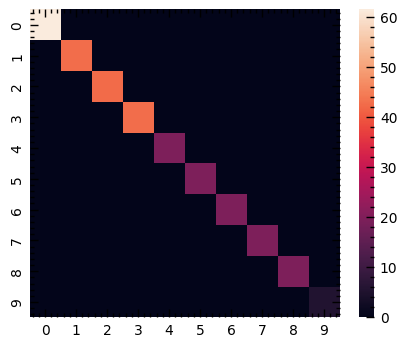

In [4]:
# Trivial obs
prod = mat_B.T @ mat_Y.T @ mat_Y @ mat_B
sns.heatmap(prod[:10,:10])
print(np.linalg.cond(prod[:10,:10]))

898236.5367299878


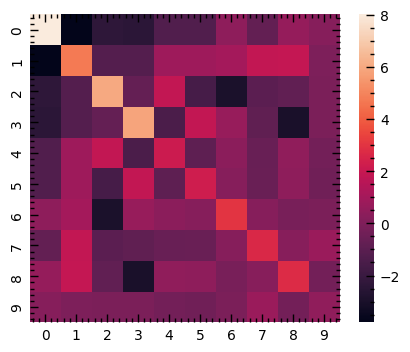

In [5]:
# Nontrivial obs
prod = mat_B.T @ mat_Y.T @ mat_P.T @ mat_P @ mat_Y @ mat_B
sns.heatmap(prod[:10,:10])
print(np.linalg.cond(prod[:10,:10]))

<Axes: >

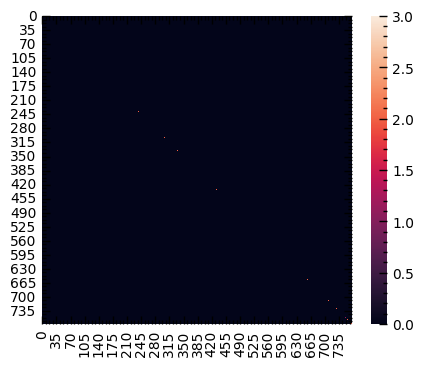

In [6]:
prod = mat_P.T @ mat_P
sns.heatmap(prod)

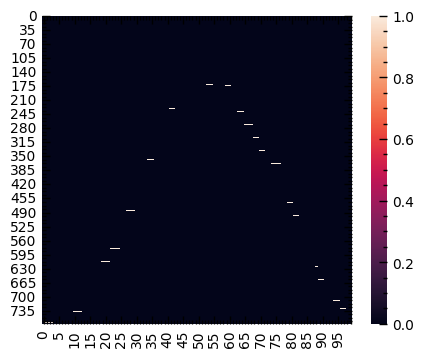

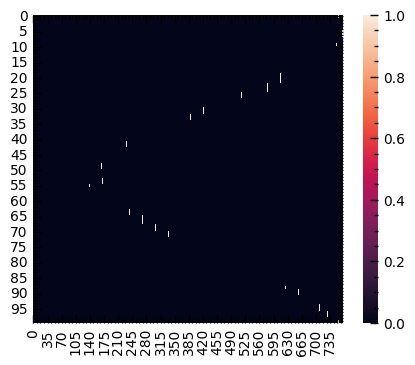

In [7]:
sns.heatmap(mat_P.T)
plt.show()
sns.heatmap(mat_P)
plt.show()

In [51]:
print("effect of B's decreasing blm coefficients")
print("lmax=nside=8 : 1/condition number of Y.T @ Y: ",1/np.linalg.cond(mat_Y.T @ mat_Y))
print("lmax=nside=8 : 1/condition number of B.T @ Y.T @ Y @ B: ",1/np.linalg.cond(mat_B.T @ mat_Y.T @ mat_Y @ mat_B))

effect of B's decreasing blm coefficients
1/condition number of Y.T @ Y:  0.9557822476531098
1/condition number of B.T @ Y.T @ Y @ B:  8.498238930857518e-06


In [52]:
mat_A, (mat_G, mat_P, mat_Y, mat_B) = FM.calc_observation_matrix_zenith_driftscan(nside=32, lmax=32, lat=-26, times=np.linspace(0, 24, 100, endpoint=False), beam_use=narrowcos, return_mat=True)
print("effect of B's decreasing blm coefficients")
print("lmax=nside=32 : 1/condition number of Y.T @ Y: ",1/np.linalg.cond(mat_Y.T @ mat_Y))
print("lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B: ",1/np.linalg.cond(mat_B.T @ mat_Y.T @ mat_Y @ mat_B))

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
effect of B's decreasing blm coefficients
lmax=nside=32 : 1/condition number of Y.T @ Y:  0.9680574474858374
lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B:  9.564344284025575e-11


In [54]:
mat_A, (mat_G, mat_P, mat_Y, mat_B) = FM.calc_observation_matrix_multi_zenith_driftscan(nside=32, lmax=32, lats=np.linspace(-80, 80, 100), times=np.linspace(0, 24, 100, endpoint=False), beam_use=narrowcos, return_mat=True)
print("effect of B's decreasing blm coefficients")
print("lmax=nside=32 : 1/condition number of Y.T @ Y: ",1/np.linalg.cond(mat_Y.T @ mat_Y))
print("lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B: ",1/np.linalg.cond(mat_B.T @ mat_Y.T @ mat_Y @ mat_B))

effect of B's decreasing blm coefficients
lmax=nside=32 : 1/condition number of Y.T @ Y:  0.9680574474858374
lmax=nside=32 : 1/condition number of B.T @ Y.T @ Y @ B:  9.564344284025575e-11


<Axes: >

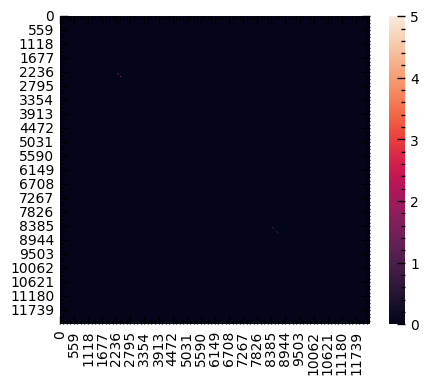

In [55]:
prod = mat_P.T @ mat_P
sns.heatmap(prod)

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561


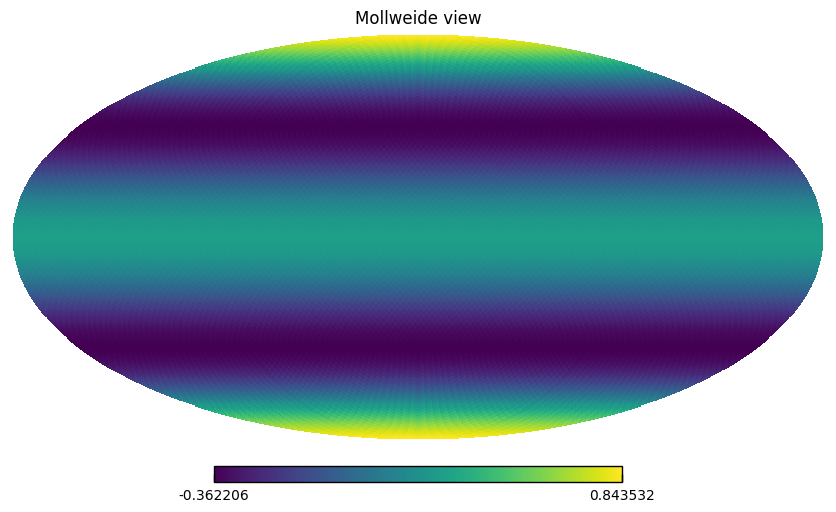

In [105]:
mat_Y = SH.calc_spherical_harmonic_matrix(nside=32, lmax=32)
hp.mollview(mat_Y[:,RS.get_idx(l=4,m=0)])

In [94]:
import src.coordinates as CO
nside = 32
lmax = 32
lats   = [-26*2, -26, 26, 26*2]
times  = np.linspace(0, 24, 100, endpoint=False)
coords = [CO.obs_zenith_drift_scan(lat, lon=0, times=times) for lat in lats]
mat_P  = CO.calc_pointing_matrix(*coords, nside=nside, pixels=False)
mat_invY  = SH.calc_inv_spherical_harmonic_matrix(nside=nside, lmax=lmax)
mat_Y  = SH.calc_spherical_harmonic_matrix(nside=nside, lmax=lmax)

12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561


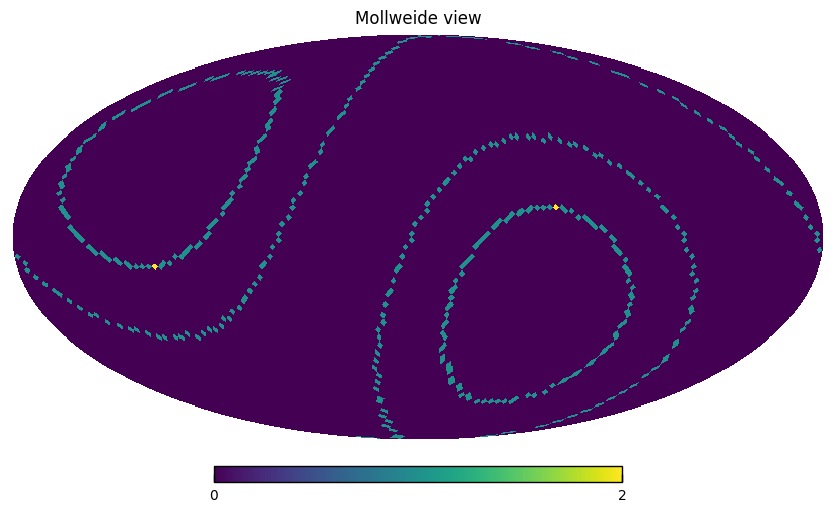

In [95]:
pointmap = np.sum(mat_P, axis=0)
hp.mollview(pointmap)

In [96]:
pointalm = RS.complex2RealALM(hp.map2alm(pointmap, lmax=lmax))

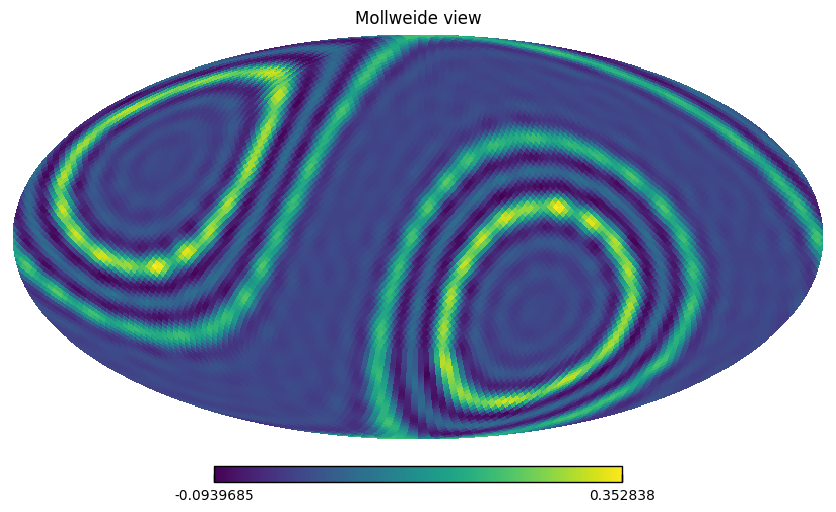

In [97]:
hp.mollview(hp.alm2map(RS.real2ComplexALM(pointalm), nside=nside))

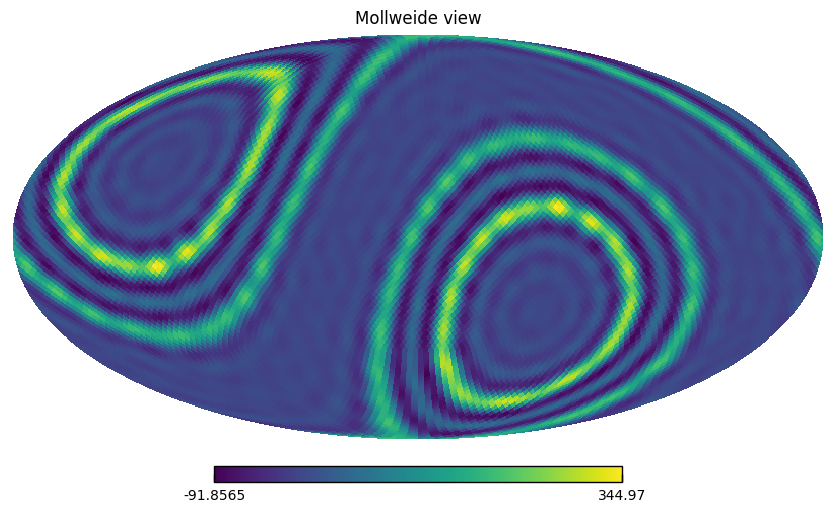

In [98]:
hp.mollview(hp.alm2map(RS.real2ComplexALM(np.sum(mat_P@mat_Y, axis=0)), nside=nside))

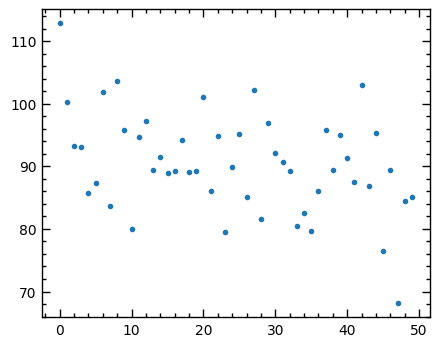

In [103]:
plt.plot(np.sum(np.abs(mat_P@mat_Y), axis=0)[:50], '.')

In [100]:
np.sum(mat_P@mat_Y, axis=0)[:4]

array([ 1.12837917e+02, -2.27595720e-15,  2.08444373e-14, -1.11022302e-14])

In [101]:
(mat_P@mat_Y)[:4,:4]

array([[ 0.28209479, -0.13295835, -0.43707022, -0.17327469],
       [ 0.28209479, -0.1462958 , -0.44263698, -0.1462958 ],
       [ 0.28209479, -0.1591702 , -0.44263698, -0.13217325],
       [ 0.28209479, -0.17068662, -0.44263698, -0.11692305]])

In [ ]:
# Maybe it's more to do with the alignment of the multipoles?
